# Loan Default Detection

Dataset from Kaggle: https://www.kaggle.com/datasets/nanditapore/credit-risk-analysis/data

This is a credit risk analysis dataset we found on Kaggle. This dataset provides essential information about loan applicants and their characteristics, including their loan rate, income, age, credit length, etc.
This dataset provides a simplified view of the factors contributing to credit risk, presenting an excellent opportunity for us to apply our machine learning analysis in determining whether a loan applicant is likely to default.


Column Descriptions:
    
* ID: Unique identifier for each loan applicant.
* Age: Age of the loan applicant.
* Income: Income of the loan applicant.
* Home: Home ownership status (Own, Mortgage, Rent).
* Emp_Length: Employment length in years.
* Intent: Purpose of the loan (e.g., education, home improvement, medical, etc.).
* Amount: Loan amount applied for.
* Rate: Interest rate on the loan.
* Status: Loan approval status (Fully Paid, Charged Off, Current).
* Percent_Income: Loan amount as a percentage of income.
* Default: Whether the applicant has defaulted on a loan previously (Yes, No).
* Cred_Length: Length of the applicant's credit history.

## Import Data

In [1]:
import pandas as pd

In [2]:
# Load the dataset
df = pd.read_csv('/Users/cengwenqi/Library/CloudStorage/OneDrive-UCIrvine/credit_risk.csv')
df.head()

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              32581 non-null  int64  
 1   Age             32581 non-null  int64  
 2   Income          32581 non-null  int64  
 3   Home            32581 non-null  object 
 4   Emp_length      31686 non-null  float64
 5   Intent          32581 non-null  object 
 6   Amount          32581 non-null  int64  
 7   Rate            29465 non-null  float64
 8   Status          32581 non-null  int64  
 9   Percent_income  32581 non-null  float64
 10  Default         32581 non-null  object 
 11  Cred_length     32581 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 3.0+ MB
None


## Data Transformation

In [4]:
# We use pd.get_dummies function to transform our categorical columns using dummy variables

df_encoded = pd.get_dummies(df, columns=["Home", "Intent"], drop_first=True)
df_encoded['Default'] = [1 if i == "Y" else 0 for i in df['Default']]
df_encoded.head()

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,0,22,59000,123.0,35000,16.02,1,0.59,1,3,False,False,True,False,False,False,True,False
1,1,21,9600,5.0,1000,11.14,0,0.10,0,2,False,True,False,True,False,False,False,False
2,2,25,9600,1.0,5500,12.87,1,0.57,0,3,False,False,False,False,False,True,False,False
3,3,23,65500,4.0,35000,15.23,1,0.53,0,2,False,False,True,False,False,True,False,False
4,4,24,54400,8.0,35000,14.27,1,0.55,1,4,False,False,True,False,False,True,False,False


In [5]:
df_encoded.isnull().sum()

Id                           0
Age                          0
Income                       0
Emp_length                 895
Amount                       0
Rate                      3116
Status                       0
Percent_income               0
Default                      0
Cred_length                  0
Home_OTHER                   0
Home_OWN                     0
Home_RENT                    0
Intent_EDUCATION             0
Intent_HOMEIMPROVEMENT       0
Intent_MEDICAL               0
Intent_PERSONAL              0
Intent_VENTURE               0
dtype: int64

In [6]:
# We use SimpleImputer to fill in the missing values with mean
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [7]:
df_imputed.isnull().sum()

Id                        0
Age                       0
Income                    0
Emp_length                0
Amount                    0
Rate                      0
Status                    0
Percent_income            0
Default                   0
Cred_length               0
Home_OTHER                0
Home_OWN                  0
Home_RENT                 0
Intent_EDUCATION          0
Intent_HOMEIMPROVEMENT    0
Intent_MEDICAL            0
Intent_PERSONAL           0
Intent_VENTURE            0
dtype: int64

In [8]:
df_cleaned = df_imputed.drop(["Id"], axis=1)
df_cleaned.head()

,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Default,Cred_length,Home_OTHER,Home_OWN,Home_RENT,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE
0,22.0,59000.0,123.0,35000.0,16.02,1.0,0.59,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,21.0,9600.0,5.0,1000.0,11.14,0.0,0.10,0.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,25.0,9600.0,1.0,5500.0,12.87,1.0,0.57,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,23.0,65500.0,4.0,35000.0,15.23,1.0,0.53,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,24.0,54400.0,8.0,35000.0,14.27,1.0,0.55,1.0,4.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [9]:
occ = df_cleaned['Default'].value_counts()
print( occ)

print(len(df))
print(occ/ len(df))

Default
0.0    26836
1.0     5745
Name: count, dtype: int64
32581
Default
0.0    0.82367
1.0    0.17633
Name: count, dtype: float64


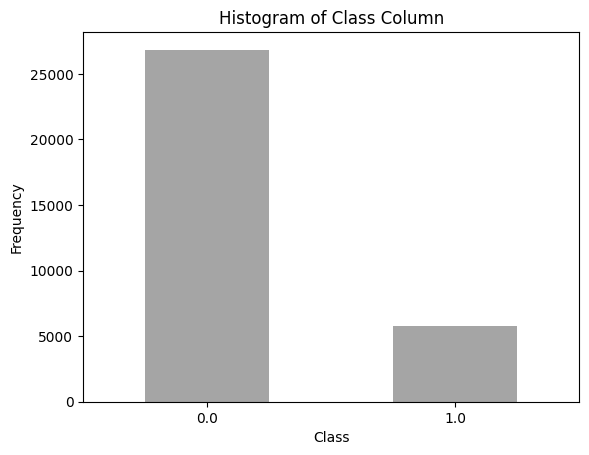

In [10]:
import matplotlib.pyplot as plt

occ.plot(kind='bar', color='tab:gray', alpha = 0.7)
plt.title('Histogram of Class Column')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Keep the class labels horizontal for readability
plt.show()

## Data Resampling

In [11]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, 
    accuracy_score, 
    ConfusionMatrixDisplay,
    roc_curve,
    auc,
    roc_auc_score,
)

from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV



In [35]:
# Split data into feature(X) and target(Y)
X =df_cleaned.drop('Default', axis=1)
Y = df_cleaned['Default']


# Create training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print("Training set: ", len(X_train))
print("Testing set: ", len(X_test))

Training set:  26064
Testing set:  6517


In [36]:
# Resample the training data
method = SMOTE()
X_resampled, Y_resampled = method.fit_resample(X_train, Y_train)

In [37]:
original = Y_train.value_counts()
resampled = Y_resampled.value_counts()

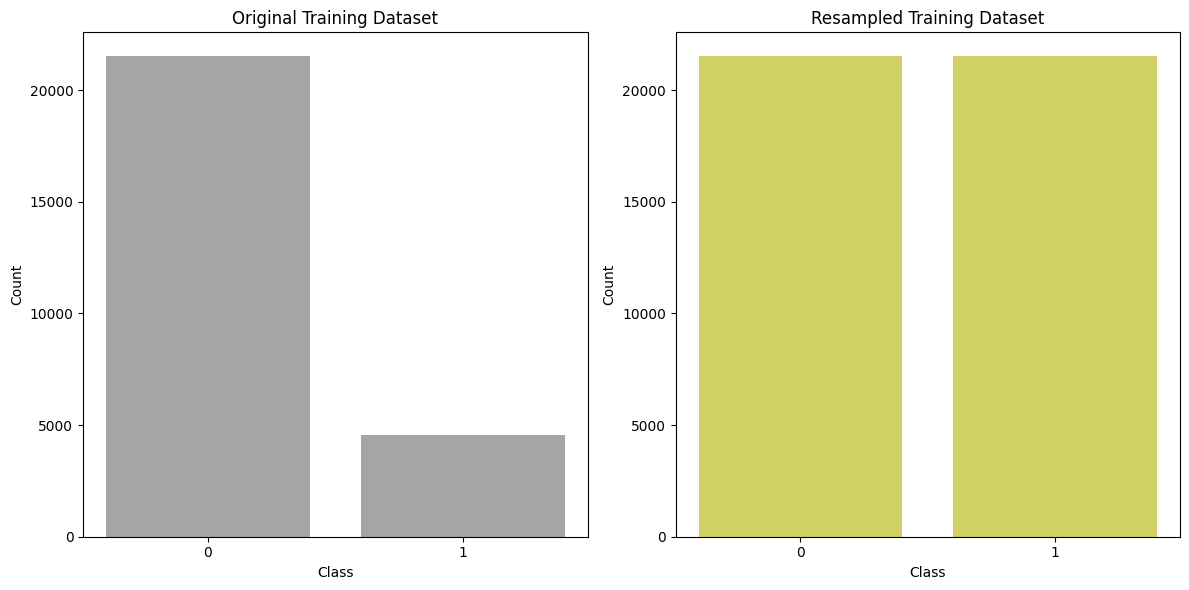

In [183]:
def plot_histograms(data1, data2):
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Original dataset
    ax[0].bar(data1.index, data1.values, color='tab:gray', alpha=0.7)
    ax[0].set_title('Original Training Dataset')
    ax[0].set_xticks([0, 1])
    ax[0].set_xlabel('Class')
    ax[0].set_ylabel('Count')

    # Resampled dataset
    ax[1].bar(data2.index, data2.values, color='tab:olive', alpha=0.7)
    ax[1].set_title('Resampled Training Dataset')
    ax[1].set_xticks([0, 1])
    ax[1].set_xlabel('Class')
    ax[1].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Plot the histograms
plot_histograms(original, resampled)


## Benchmark Model Training

### Logistice Regression

In [39]:
# Fit a logistic regression model to our data
log_model = LogisticRegression()
log_model.fit(X_resampled, Y_resampled)

# Get prediction
log_model_pred = log_model.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Classification Metrix

In [40]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, log_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, log_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.72      0.82      5322
         1.0       0.39      0.80      0.53      1195

    accuracy                           0.74      6517
   macro avg       0.67      0.76      0.67      6517
weighted avg       0.84      0.74      0.76      6517

Accuracy: 0.7363817707534142


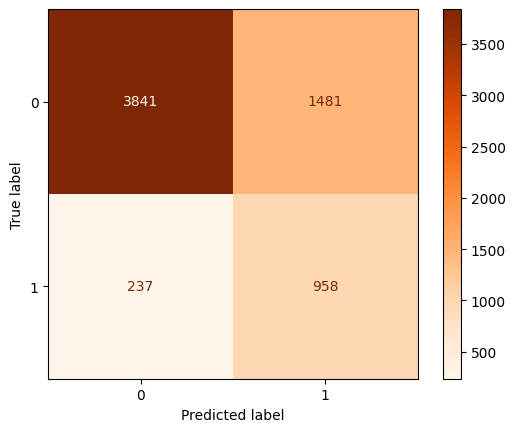

In [41]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, log_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### Rondom Forest

In [42]:
# Fit a random forest model to our data
rf_model = RandomForestClassifier()
rf_model.fit(X_resampled, Y_resampled)

# Get prediction
rf_model_pred = rf_model.predict(X_test)

##### Classification Metrix

In [43]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, rf_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, rf_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      5322
         1.0       0.53      0.48      0.50      1195

    accuracy                           0.83      6517
   macro avg       0.71      0.69      0.70      6517
weighted avg       0.82      0.83      0.82      6517

Accuracy: 0.8258401104802824


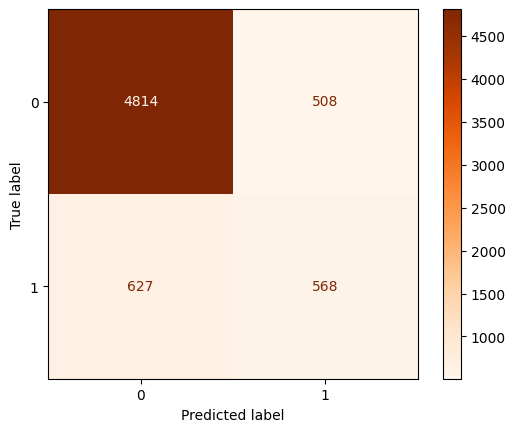

In [44]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, rf_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### XGBoost

In [45]:
# Fit a xgboost model to our data
xg_model = XGBClassifier()
xg_model.fit(X_resampled, Y_resampled)

# Get prediction
xg_model_pred = xg_model.predict(X_test)

##### Classification Metrix

In [46]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, xg_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, xg_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90      5322
         1.0       0.54      0.50      0.52      1195

    accuracy                           0.83      6517
   macro avg       0.71      0.70      0.71      6517
weighted avg       0.83      0.83      0.83      6517

Accuracy: 0.8299831210679761


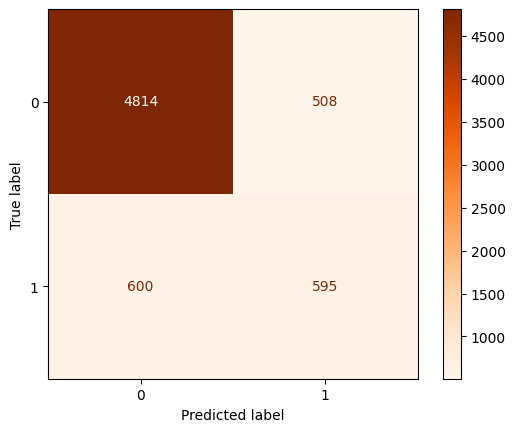

In [47]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, xg_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

## ROC for Benchmark Models

In [184]:
pred1 = rf_model.predict_proba(X_test)
pred2 = log_model.predict_proba(X_test)
pred3 = xg_model.predict_proba(X_test)


In [185]:
fpr1, tpr1, _ = roc_curve(Y_test, pred1[:, 1])
fpr2, tpr2, _ = roc_curve(Y_test, pred2[:, 1])
fpr3, tpr3, _ = roc_curve(Y_test, pred3[:, 1])

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

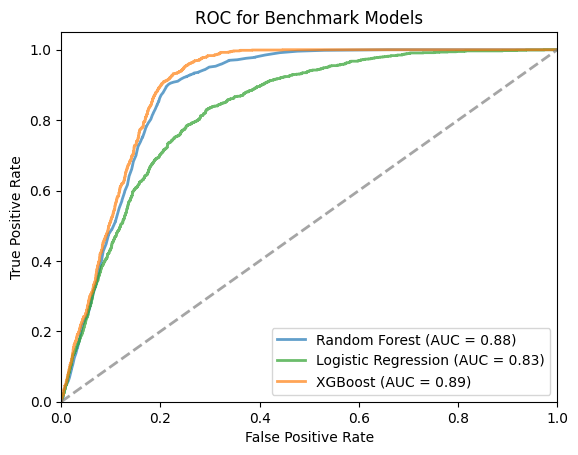

In [186]:
plt.figure()

plt.plot(fpr1, tpr1, color='tab:blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc1, alpha = 0.7)
plt.plot(fpr2, tpr2, color='tab:green', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc2, alpha = 0.7)
plt.plot(fpr3, tpr3, color='tab:orange', lw=2, label='XGBoost (AUC = %0.2f)' % auc3, alpha = 0.7)

plt.plot([0, 1], [0, 1], color='tab:gray', lw=2, linestyle='--', alpha = 0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Benchmark Models')
plt.legend(loc="lower right")
plt.show()


## Improvement on Benchmark Models

In [79]:
from sklearn.preprocessing import StandardScaler

# Scale the features to ensure they have similar scales
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Logistic Regression

In [87]:
# Utilize lasso (l1) regularization and the C parameters
new_log_model = LogisticRegression(penalty='l1', C=0.05, solver='liblinear', random_state=42)
new_log_model.fit(X_train_scaled, Y_train)


LogisticRegression(C=0.05, penalty='l1', random_state=42, solver='liblinear')

In [93]:
# Get prediction
new_log_model_pred = new_log_model.predict(X_test_scaled)

#### Classification Metrix

In [94]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, new_log_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, new_log_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.85      0.94      0.90      5322
         1.0       0.52      0.28      0.37      1195

    accuracy                           0.82      6517
   macro avg       0.69      0.61      0.63      6517
weighted avg       0.79      0.82      0.80      6517

Accuracy: 0.8209298757096823


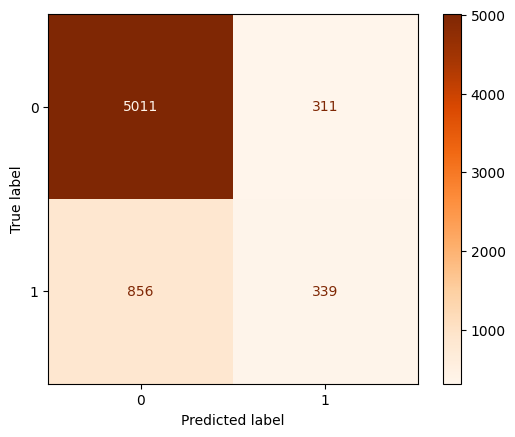

In [95]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, new_log_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### Random Forest

#### Grid Search

In [115]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [5, 10, 15, 20, 25, 30],
    'min_samples_split' : [2, 5, 10],
    'min_samples_leaf' : [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, Y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.3s
[CV] END max_depth=5, min_samples_leaf=1,

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}

In [136]:
# Input the optimal parameters in the model
new_rf_model = RandomForestClassifier(class_weight={0:1, 1:8}, max_depth = 15, min_samples_leaf = 1, min_samples_split= 5, n_estimators = 200, random_state=42)
new_rf_model.fit(X_train_scaled, Y_train)


RandomForestClassifier(class_weight={0: 1, 1: 8}, max_depth=15,
                       min_samples_split=5, n_estimators=200, random_state=42)

In [137]:
# Get prediction
new_rf_model_pred = new_rf_model.predict(X_test_scaled)

#### Classification Metrix

In [138]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, new_rf_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, new_rf_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.82      0.89      5322
         1.0       0.52      0.84      0.64      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.83      0.76      6517
weighted avg       0.88      0.83      0.84      6517

Accuracy: 0.8266073346631886


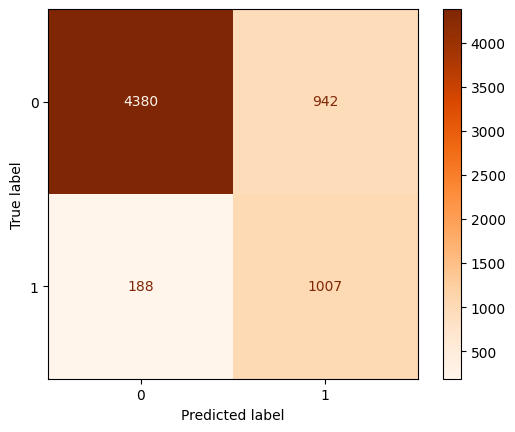

In [139]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, new_rf_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### XGBoost

In [143]:
# This makes it so the "1" class is more weighted than the 0 since our model
# has trouble predicting the "1" class
scale_pos_weight = (len(Y_train) - sum(Y_train)) / sum(Y_train)

In [144]:
# Implementing our new model on the resampled and scaled data
new_xgb_model = XGBClassifier(learning_rate = 0.05, scale_pos_weight=3, random_state=42, max_depth = 4)
new_xgb_model.fit(X_train_scaled, Y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [146]:
# Getting our new prediction
new_xgb_model_pred = new_xgb_model.predict(X_test_scaled)

#### Classification Metrix

In [147]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, new_xgb_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, new_xgb_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.82      0.89      5322
         1.0       0.52      0.87      0.65      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.84      0.77      6517
weighted avg       0.88      0.83      0.84      6517

Accuracy: 0.8270676691729323


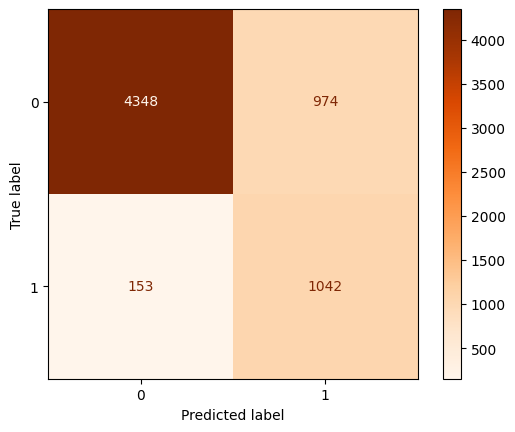

In [148]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, new_xgb_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

## ROC for Improved Models

In [153]:
pred1 = new_rf_model.predict_proba(X_test_scaled)
pred2 = new_log_model.predict_proba(X_test_scaled)
pred3 = new_xgb_model.predict_proba(X_test_scaled)

In [154]:
fpr1, tpr1, _ = roc_curve(Y_test, pred1[:, 1])
fpr2, tpr2, _ = roc_curve(Y_test, pred2[:, 1])
fpr3, tpr3, _ = roc_curve(Y_test, pred3[:, 1])

auc1 = auc(fpr1, tpr1)
auc2 = auc(fpr2, tpr2)
auc3 = auc(fpr3, tpr3)

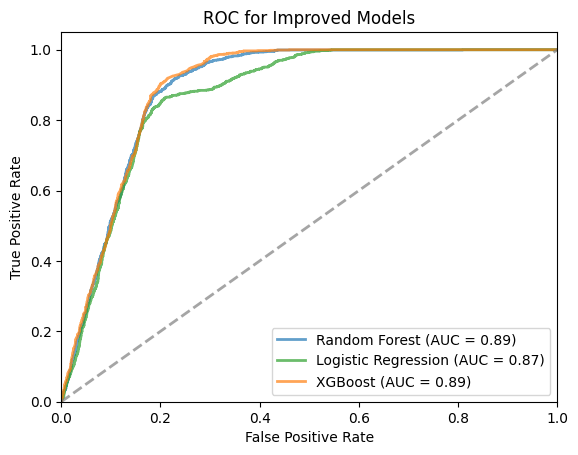

In [155]:
plt.figure()

plt.plot(fpr1, tpr1, color='tab:blue', lw=2, label='Random Forest (AUC = %0.2f)' % auc1, alpha = 0.7)
plt.plot(fpr2, tpr2, color='tab:green', lw=2, label='Logistic Regression (AUC = %0.2f)' % auc2, alpha = 0.7)
plt.plot(fpr3, tpr3, color='tab:orange', lw=2, label='XGBoost (AUC = %0.2f)' % auc3, alpha = 0.7)

plt.plot([0, 1], [0, 1], color='tab:gray', lw=2, linestyle='--', alpha = 0.7)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Improved Models')
plt.legend(loc="lower right")
plt.show()

## Ensemble Method

### Define the three classifiers to use in the ensemble

In [174]:
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(penalty='l1', C=0.05, solver='liblinear', random_state=42)
clf2 = RandomForestClassifier(class_weight={0:1, 1:8}, max_depth = 15, min_samples_leaf = 1, min_samples_split= 5, n_estimators = 200, random_state=42)
clf3 = XGBClassifier(learning_rate = 0.05, scale_pos_weight=3, random_state=42, max_depth = 4)


#### Hard voting

In [175]:
# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='hard')

ensemble_model.fit(X_train_scaled, Y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.05, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 8},
                                                     max_depth=15,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))])

In [176]:
ensemble_model_pred = ensemble_model.predict(X_test_scaled)

#### Classification Metrix

In [177]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, ensemble_model_pred)}")
print(f"Accuracy: {accuracy_score(Y_test, ensemble_model_pred)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      5322
         1.0       0.52      0.83      0.64      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.83      0.76      6517
weighted avg       0.88      0.83      0.84      6517

Accuracy: 0.8295227865582323


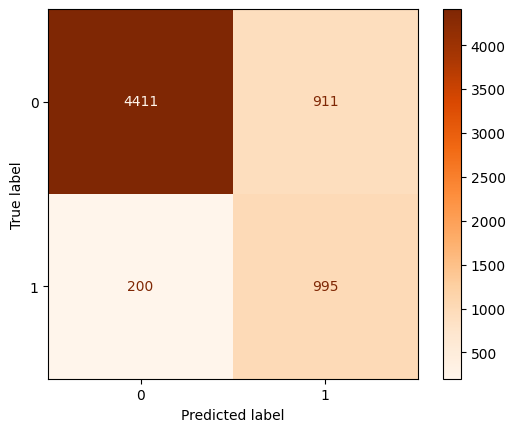

In [178]:
# Confusion matrix
ConfusionMatrixDisplay.from_predictions(Y_test, ensemble_model_pred, cmap = plt.cm.Oranges, normalize = None, display_labels = ['0', '1'])

### Adjust Weights within the Voting Classifier

In [179]:
ensemble_model_weight = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('xgb', clf3)], voting='soft', weights=[1, 1, 5], flatten_transform=True)

ensemble_model_weight.fit(X_train_scaled, Y_train)


VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.05, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(class_weight={0: 1, 1: 8},
                                                     max_depth=15,
                                                     min_samples_split=5,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample...
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.05, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=4,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                 voting='soft', weights=[1, 1, 5])

In [180]:
ensemble_model_pred_weight= ensemble_model_weight.predict(X_test_scaled)

In [181]:
# Classification report
print(f"Classification Report:\n{classification_report(Y_test, ensemble_model_pred_weight)}")
print(f"Accuracy: {accuracy_score(Y_test, ensemble_model_pred_weight)}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.83      0.89      5322
         1.0       0.52      0.84      0.64      1195

    accuracy                           0.83      6517
   macro avg       0.74      0.83      0.77      6517
weighted avg       0.88      0.83      0.84      6517

Accuracy: 0.8301365659045573


## Conclusion

| Model | Precision for Class 1 (Default) | Recall for Class 1 (Default) | F1 for Class 1 (Default) | Testing Accuracy
| :---: | :-----------------------------: | :--------------------------: | :----------------------: | :--------------: |
| Logistic Regression | 0.52 | 0.28 | 0.37 | 0.82|
| Random Forest | 0.52 | 0.84 | 0.64 | 0.84 |
| XGBoost | 0.52 | 0.87 | 0.65 | 0.83 |
| Ensemble Model (hard voting) | 0.52 | 0.83 | 0.64 | 0.83 | 
| Ensemble Model (adjust weights within voting) |0.52 | 0.84 | 0.64 | 0.83

If we only focus on testing accuracy, all five models perform similarly. However, in predicting loan defaults, it is more important to prioritize recall since the cost of missing an actual default is usually higher than the cost of incorrectly predicting a loan default.

XGBoost has the highest recall and F1 score. This is reasonable because logistic regression models the relationship between the features and the log odds of the target variable as a linear combination of features, limiting its performance when the relationship is not linear. This limitation is reflected in the table's low recall and F1-score of the logistic regression model. The Random Forest model, also based on decision trees, builds trees independently in parallel. However, XGBoost improves on this by boosting the training process to correct the errors of previous trees.

In conclusion, although building an ensemble model usually results in better performance than individual models, in this case, XGBoost outperforms the others and is likely the most suitable model. This practice leverages the knowledge and skills I acquired in the UCI BANA273 Machine Learning class, providing me with a more comprehensive understanding of real-world applications.